In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys 

sys.path.append(os.path.abspath(os.path.join('..')))
from src import preprocessing as dp

In [2]:
path = "../data/processed/processed_data.csv"
try:
    df = pd.read_csv(path, parse_dates=['timestamp'])
    print("[SUCCESS]: Loading dataset successful")
except Exception as e:
    print(f"[ERROR]: Loading dataset fail: {e}")

[SUCCESS]: Loading dataset successful


**Câu hỏi nghiên cứu:** Mối quan hệ giữa đặc điểm khí hậu vùng miền và mức độ ô nhiễm không khí (AQI) ở 7 vùng khí hậu Việt Nam là gì, và vì sao các vùng có khí hậu khác nhau lại có mức AQI chênh lệch đáng kể ?

**Why is this question worth investigating**:
- Việt Nam có sự đa dạng khí hậu rất lớn theo vùng, từ núi cao mát mẻ (Tây Nguyên, Tây Bắc) đến vùng đồng bằng và đô thị hóa mạnh (Đồng bằng Bắc Bộ, Nam Bộ).

- AQI là chỉ số ảnh hưởng trực tiếp đến sức khỏe cộng đồng, nhưng không chỉ phụ thuộc vào hoạt động kinh tế mà còn bị chi phối bởi điều kiện khí hậu (nhiệt độ, gió mùa, mưa, địa hình).

Việc phân tích mối liên hệ này giúp giải thích tại sao những vùng ít công nghiệp vẫn có AQI cao, hoặc ngược lại, vùng phát triển kinh tế nhưng AQI thấp hơn dự kiến.

**What real-world problem or decision does this inform ?** 

- Ra quyết định quy hoạch đô thị và công nghiệp theo vùng khí hậu, tránh tập trung nguồn ô nhiễm ở các vùng dễ tích tụ khí bẩn (như Đồng bằng Bắc Bộ).

- Thiết kế chính sách kiểm soát ô nhiễm theo mùa, đặc biệt tại Bắc Trung Bộ và Đông Bắc.

- Định hướng phát triển bền vững, ví dụ:

    - Khuyến khích du lịch, nghỉ dưỡng tại Tây Nguyên, Tây Bắc.

    - Tăng không gian xanh, hạn chế phương tiện cá nhân ở vùng AQI cao.

- Cải thiện chất lượng sống và sức khỏe cộng đồng dựa trên hiểu biết khoa học, không cảm tính.

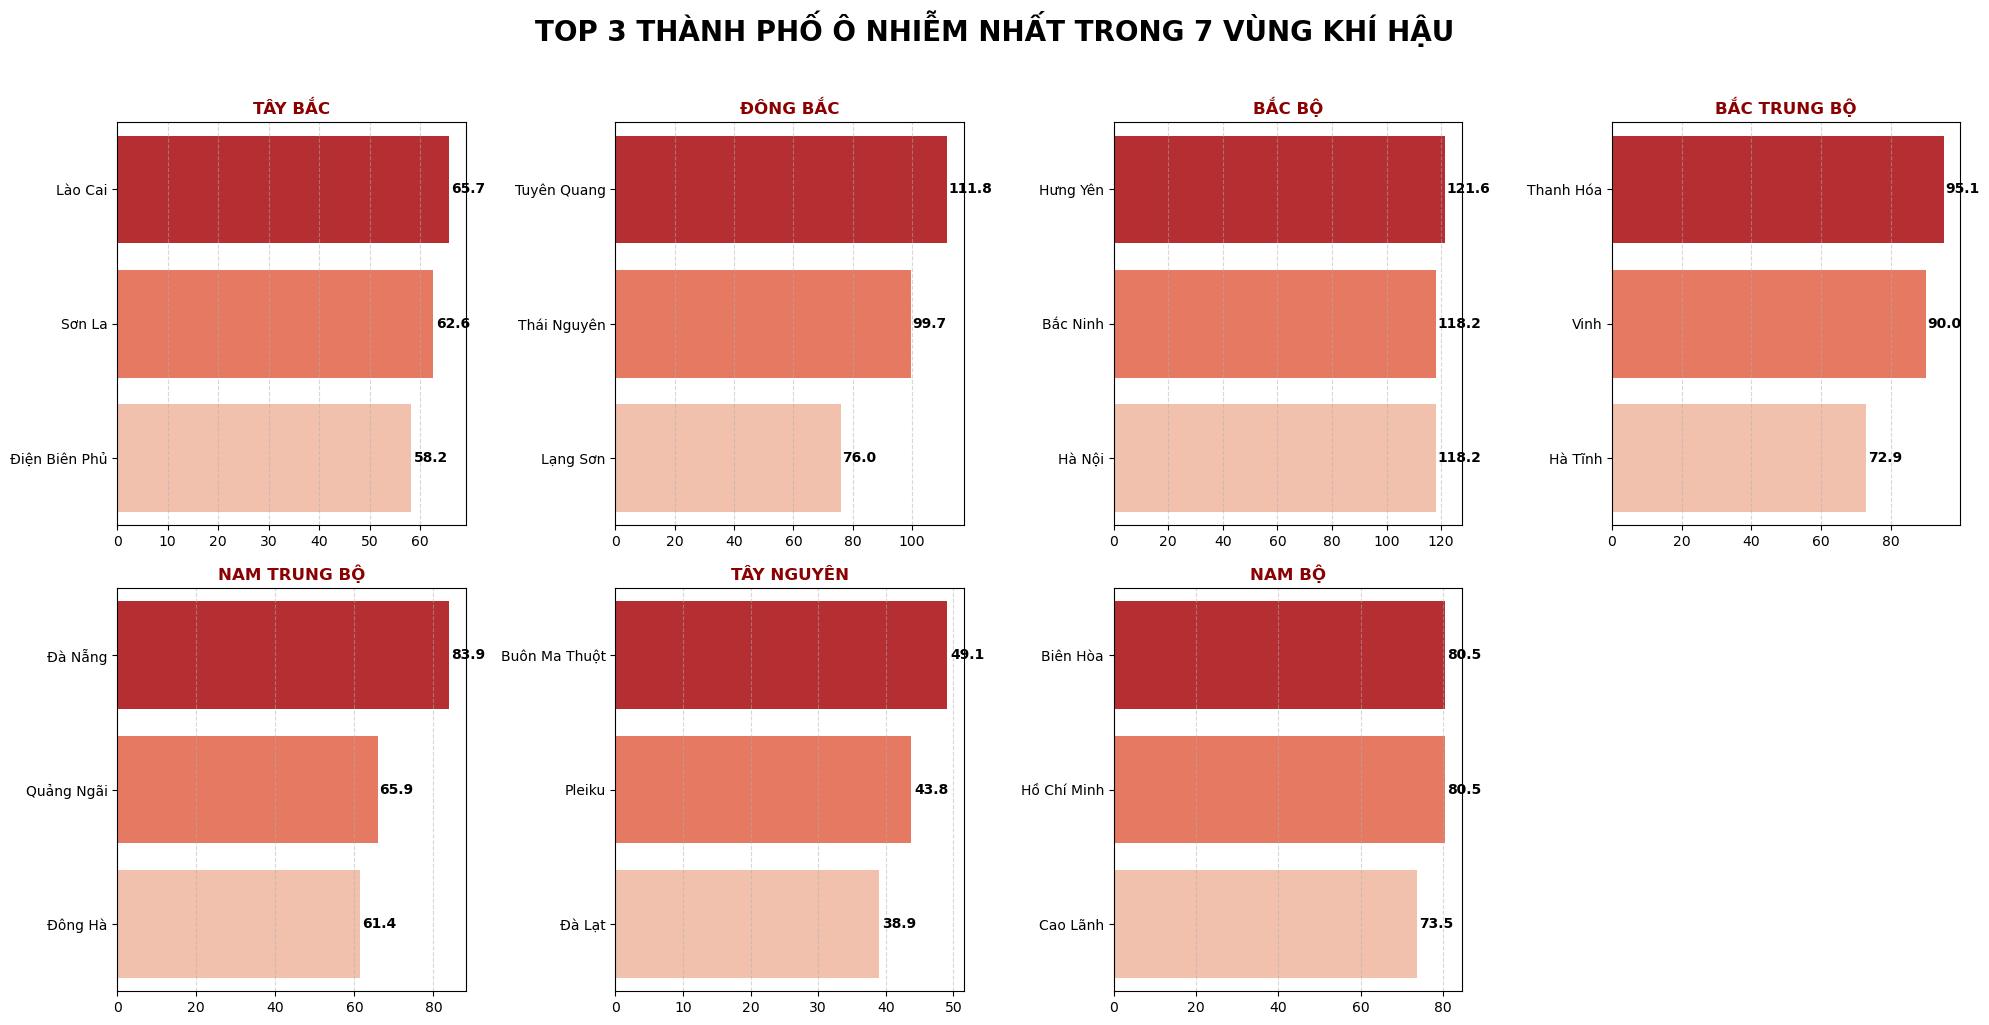

In [ ]:
df['region'] = df['city'].apply(dp.classify_region)

# Set up data
region_stats = df.groupby(['region', 'city'])['aqi'].mean().reset_index()
target_regions = [
    "Tây Bắc", "Đông Bắc", "Bắc Bộ", "Bắc Trung Bộ", "Nam Trung Bộ", "Tây Nguyên", "Nam Bộ"]

# Draw chart
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('TOP 3 THÀNH PHỐ Ô NHIỄM NHẤT TRONG 7 VÙNG KHÍ HẬU', fontsize=20, fontweight='bold', y=1.02)
axes_flat = axes.flatten() # Convert into list have 8 elements
for i, region in enumerate(target_regions):
    ax = axes_flat[i]
    
    # Take the data
    data = region_stats[region_stats['region'] == region]
    top_3 = data.sort_values('aqi', ascending=False).head(3)
    
    if not top_3.empty:
        # Draw chart
        sns.barplot(data=top_3, x='aqi', y='city', hue='city', legend=False, ax=ax, palette='Reds_r')
        ax.set_title(region.upper(), fontsize=12, fontweight='bold', color='#8B0000')
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.grid(axis='x', linestyle='--', alpha=0.5)
        
        # Display information
        for index, value in enumerate(top_3['aqi']):
            ax.text(value + 0.5, index, f'{value:.1f}', va='center', fontweight='bold')
    else:
        ax.text(0.5, 0.5, "Don't have data", ha='center', va='center')
        ax.set_title(region)

# Hidden box 8
axes_flat[-1].axis('off')
plt.tight_layout()
plt.show()



**Phân tích chi tiết từ biểu đồ**: Từ biểu đồ trên, ta có thể thấy rõ xu hướng AQI theo vùng khí hậu và kết quả cho thấy sự khác biệt rõ rệt về chất lượng không khí giữa các vùng:
1. **Mức độ ô nhiễm không khí không lành mạnh (101-150) gồm Đông Bắc và Bắc Bộ**
- **Dữ liệu cho thấy**: Vùng **Đông Bắc** và **đồng bằng Bắc Bộ** có chỉ số AQI cao nhất cả nước và đang ở tình trạng đáng báo động. Các chỉ số dao động từ: Tuyên Quang với **111.8** hay Bắc Ninh với **118.2** và chạm đỉnh là Hưng Yên với con số **121.6**

- **Nguyên nhân**: Đây là các vùng có **mật độ dân cư cao**. Đặc biệt bởi đặc điểm khí hậu có 4 mùa rõ rệt, mùa đông lạnh là tử huyệt. Vào mùa đông, hiện tượng nghịch nhiệt (thermal inversion) xảy ra thường xuyên, tạo ra một lớp không khí lạnh nằm sát mặt đất bị đè bởi lớp khí ấm bên trên, khiến bụi mịn từ các khu công nghiệp và đô thị không thể thoát lên cao hay bay đi xa. 

2. **Mức độ ô nhiễm không khí vừa phải (51-100) gồm Bắc Trung Bộ, Nam Trung Bộ và Nam Bộ**:
- **Dữ liệu cho thấy**: Ba vùng khí hậu trên có chỉ số AQI vừa phải, cụ thể là Nam Trung Bộ: 61.4 – 83.9, Bắc Trung Bộ: 72.9 – 95.1, Nam Bộ: 73.5-80.5

- **Nguyên nhân**: Nóng quanh năm giúp không khí luôn có sự đối lưu (khí nóng bốc lên cao mang theo bụi), cộng với gió từ biển (đối với miền Trung) và không gian mở giúp bụi được khuếch tán tốt hơn. Dù lượng phát thải của TP.HCM rất lớn, nhưng khí hậu đã "cứu" thành phố này khỏi mức AQI tím ngắt như Hà Nội. 

3. **Mức độ ô nhiễm không khí tốt (0-50) gồm vùng Tây Bắc và Tây Nguyên**: 
- **Dữ liệu cho thấy**: Đây là hai **lá phổi xanh** của Việt Nam với chỉ số AQI dao động rất thấp gồm Đà Lạt ~38, Pleiku ~43 và cao nhất là Sơn La ~62
- **Nguyên nhân**: Đặc thù "Cao nguyên mát mẻ" và "Núi cao". Ở độ cao lớn và mật độ dân cư/công nghiệp thấp giúp không khí luôn tươi mới

**Key insight**: Từ câu hỏi trên cho thấy, **khí hậu đóng vai trò điều tiết mức độ tích tụ ô nhiễm** ngay cả khi chưa xét sâu đến yếu tố công nghiệp hay giao thông. Không phải vùng nào phát triển kinh tế mạnh cũng có AQI cao, nhưng vùng có điều kiện khí hậu bất lợi dễ tích tụ ô nhiễm hơn. Cùng một lượng khí thải xe máy/nhà máy, nếu xả ra ở TP.HCM (Nam Bộ - khí hậu nóng đối lưu) thì AQI chỉ khoảng 80 (Vàng), nhưng nếu xả ra ở Hưng Yên (Bắc Bộ - mùa đông lạnh nghịch nhiệt) thì AQI vọt lên 121 (Cam/Đỏ).

**Câu hỏi nghiên cứu**: mức AQI cao tại khu vực Bắc Bộ và đồng bằng Bắc Bộ này chủ yếu bắt nguồn từ các nguồn phát thải nội tại hay do ô nhiễm ngoại lai được vận chuyển bởi gió từ các khu vực lân cận?

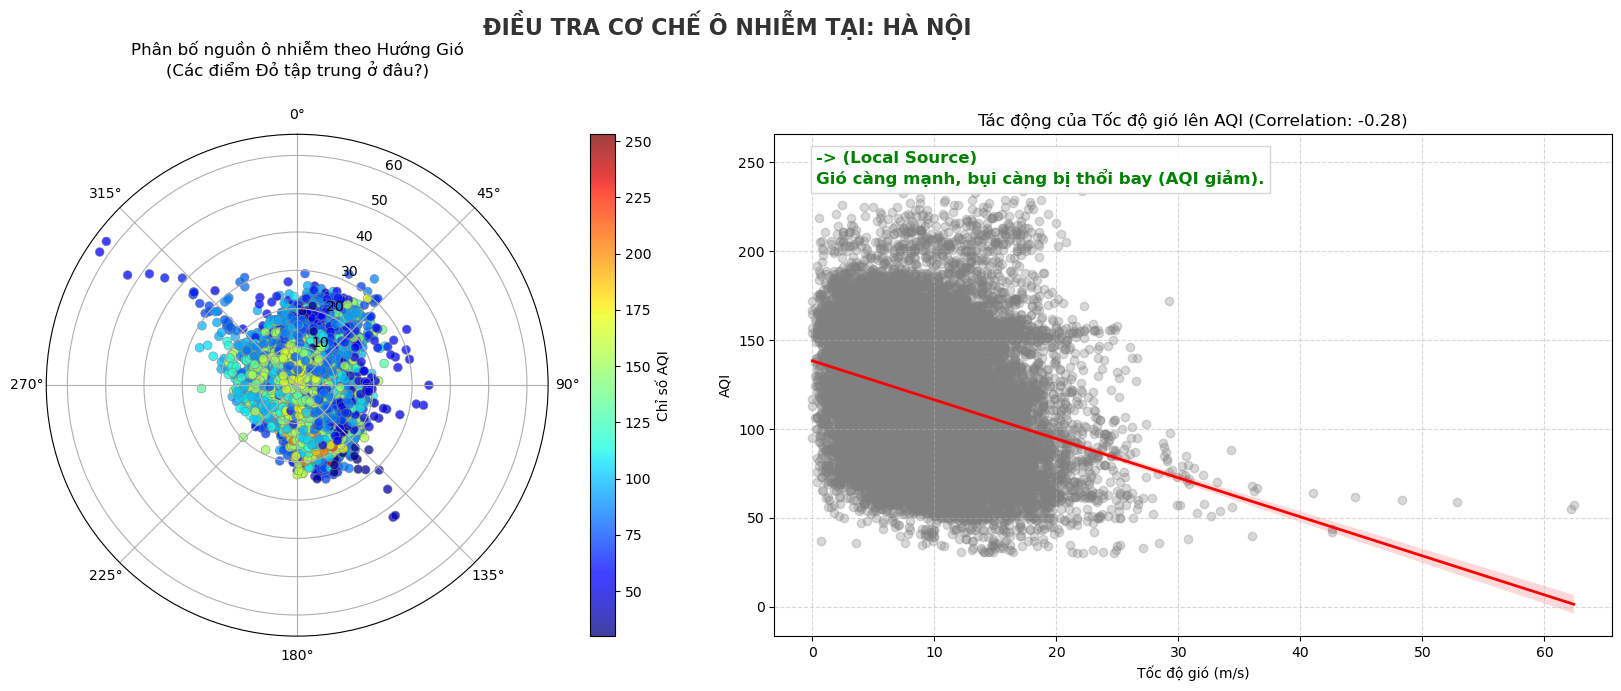

--------------------------------------------------------------------------------


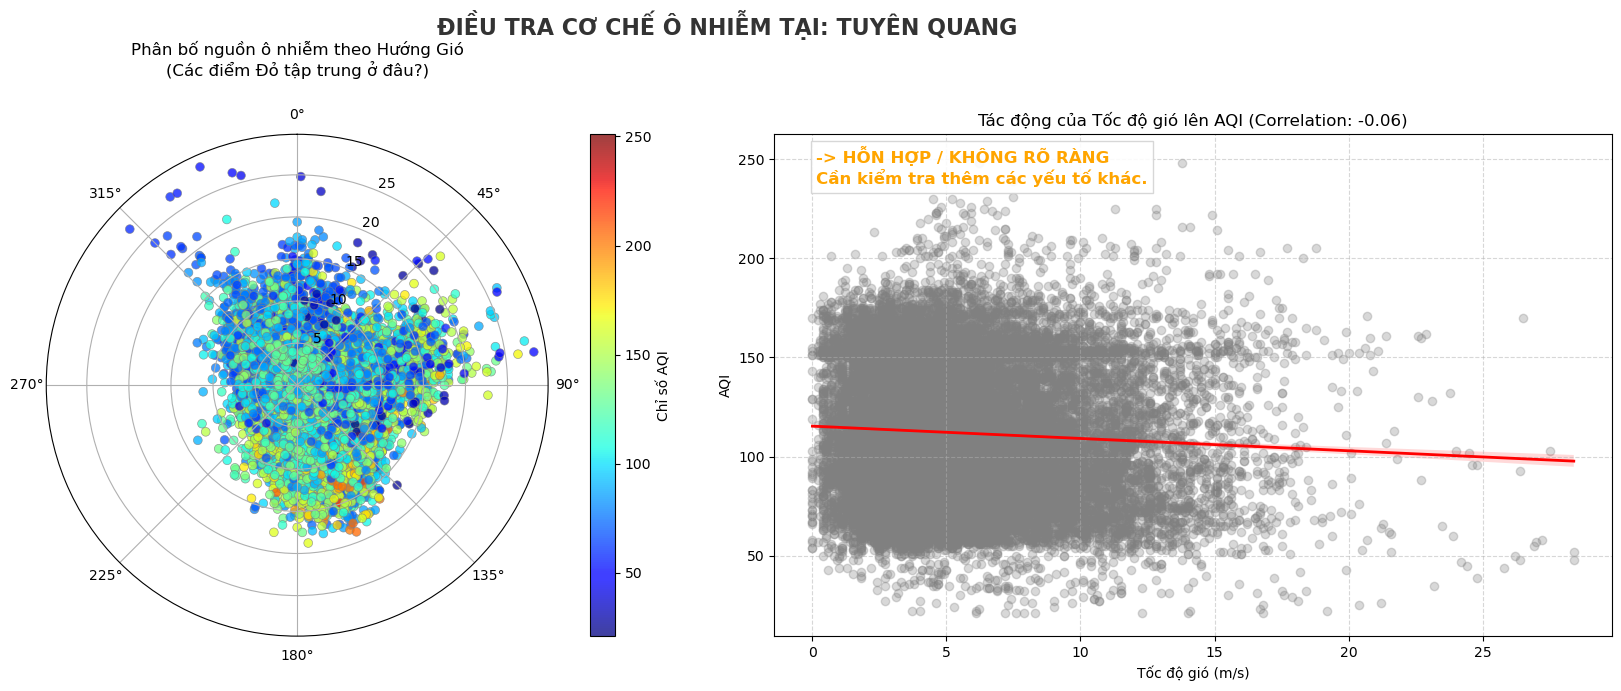

--------------------------------------------------------------------------------


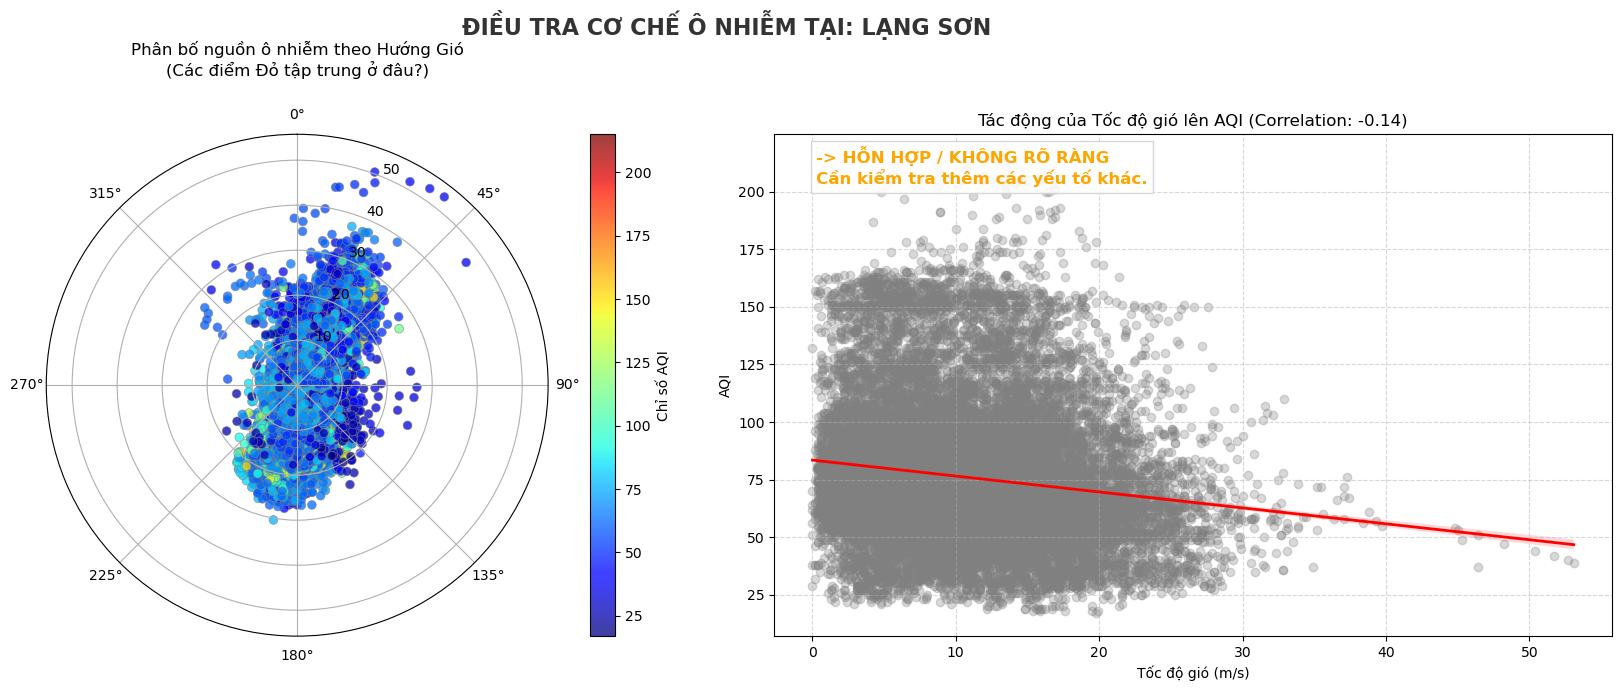

--------------------------------------------------------------------------------


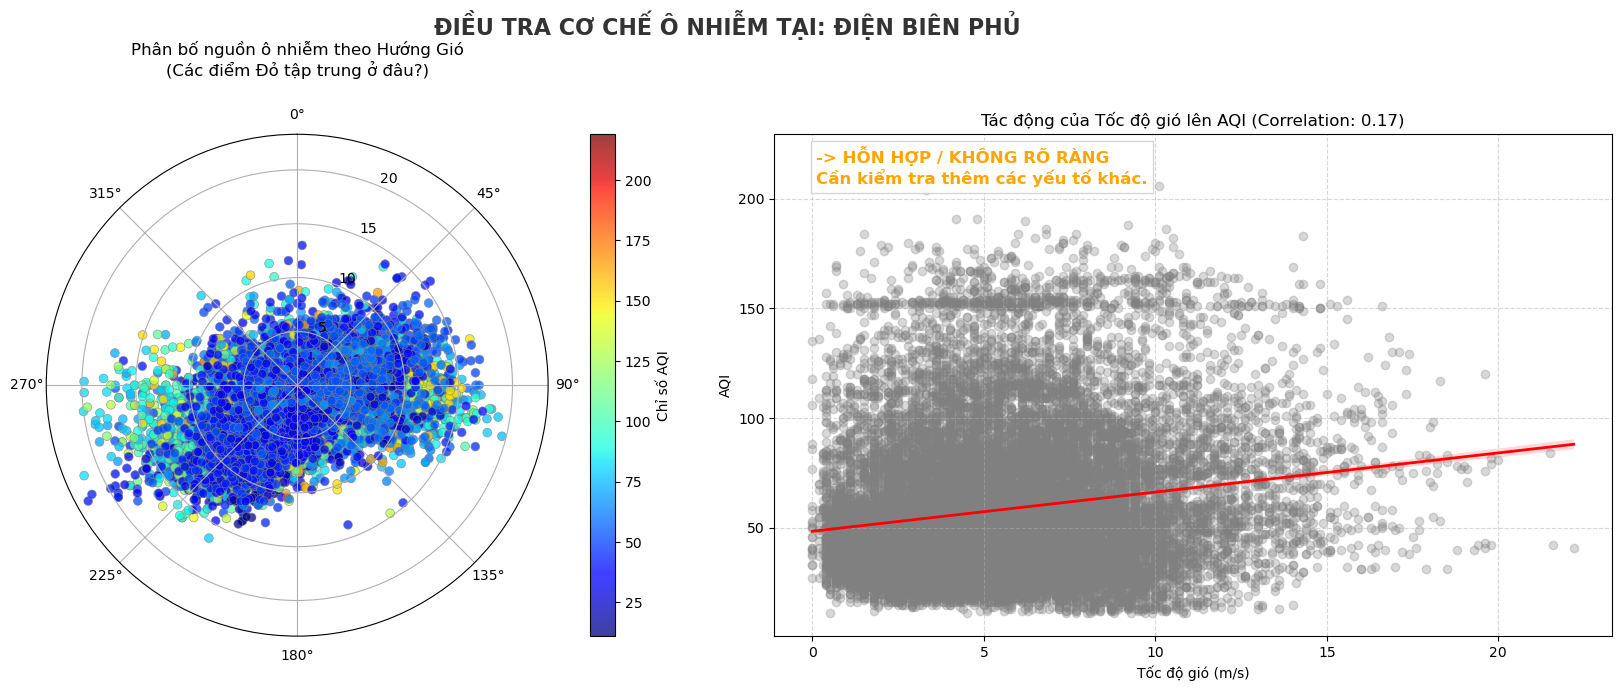

--------------------------------------------------------------------------------


In [18]:
def investigate_pollution_mechanisms(city_name, df):
    # Filter data base on city
    city_df = df[df['city'] == city_name].copy()
    
    # Create chart frame
    fig = plt.figure(figsize=(18, 7))
    fig.suptitle(f'ĐIỀU TRA CƠ CHẾ Ô NHIỄM TẠI: {city_name.upper()}', 
                 fontsize=16, fontweight='bold', color='#333333')

    # Chart 1: Pollution Rose
    ax1 = fig.add_subplot(121, projection='polar')
    
    # Conver degree into radian
    theta = np.radians(city_df['wind_dir'])
    r = city_df['wind_speed']
    c = city_df['aqi']
    
    # Draw scatter plot
    sc = ax1.scatter(theta, r, c=c, cmap='jet', alpha=0.75, s=40, edgecolors='grey', linewidth=0.5)
    
    # Set geographic 
    ax1.set_theta_zero_location('N')
    ax1.set_theta_direction(-1)
    
    ax1.set_title("Phân bố nguồn ô nhiễm theo Hướng Gió\n(Các điểm Đỏ tập trung ở đâu?)", y=1.1, fontsize=12)
    plt.colorbar(sc, ax=ax1, label='Chỉ số AQI')
    
    # Chart 2: Regression plot
    ax2 = fig.add_subplot(122)
    
    # Draw scatter plot combine with regression plot
    sns.regplot(data=city_df, x='wind_speed', y='aqi', 
                scatter_kws={'alpha': 0.3, 'color': 'gray'}, 
                line_kws={'color': 'red', 'linewidth': 2},   
                ax=ax2)
    
    # Correlation Coefficient
    corr = city_df['wind_speed'].corr(city_df['aqi'])
    

    if corr < -0.2:
        mechanism = "-> (Local Source)\nGió càng mạnh, bụi càng bị thổi bay (AQI giảm)."
        color_text = 'green'
    elif corr > 0.2:
        mechanism = "-> (Transboundary)\nGió mạnh mang bụi từ nơi khác tới (AQI tăng)."
        color_text = 'red'
    else:
        mechanism = "-> HỖN HỢP / KHÔNG RÕ RÀNG\nCần kiểm tra thêm các yếu tố khác."
        color_text = 'orange'

    # Trang trí
    ax2.set_title(f'Tác động của Tốc độ gió lên AQI (Correlation: {corr:.2f})', fontsize=12)
    ax2.set_xlabel('Tốc độ gió (m/s)')
    ax2.set_ylabel('AQI')
    ax2.grid(True, linestyle='--', alpha=0.5)
    
    # In kết luận lên biểu đồ
    ax2.text(0.05, 0.9, mechanism, transform=ax2.transAxes, 
             fontsize=12, fontweight='bold', color=color_text,
             bbox=dict(facecolor='white', alpha=0.9, edgecolor='lightgray'))

    plt.tight_layout()
    plt.show()

target_cities = ["Hà Nội", "Tuyên Quang", "Lạng Sơn", "Điện Biên Phủ"]
for city in target_cities:
    investigate_pollution_mechanisms(city, df)
    print("-" * 80)